# PY3109: Observational Astrophysics

**Module Objective:** To provide students with an overview of observational astrophysics.

**Module Content**: Magnitude brightness scale, optical telescopes, introduction to radio, IR, UV, X-ray astronomy, Hertzsprung-Russell diagram, stellar spectra & classification, variable and binary stars.

**Learning Outcomes**: On successful completion of this module, students should be able to:

1. Perform simple numerical calculations covering a wide range of astronomical topics, inluding magnitude brightness scale, radio, IR, UV and X-ray astronomy.
2. Explain the theory of star formation, stellar atmospheres and stellar structure.
3. Apply stellar structure theory to white dwarfs and neutron stars.
4. Demonstrate the ability to perform astronomical observations and gather astronomical data.

**Assessment**: Total Marks 100: Formal Written Examination 80 marks; Continuous Assessment 20 marks (10 assignments, 2 marks each).

In [1]:
#Setup cell importing modules used in this notebook
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy.coordinates import get_body_barycentric, get_body, get_moon

# Section 1: The Coordinate System
**Relevant Literature**: Chapter 1 of Carroll and Ostlie

<div class="alert alert-block alert-success">
<b> Key Question </b> 
How do we convey the positions of stars in the night sky to people who are observing from a different place on the Earths surface, or who live at different time to us (and make sense of observations taken thousands of years ago)? Defining a coordinate system which accounts for the tilt and precession of the Earths spin axis relative to the Sun-Earth orbital plane is non-trivial, and in order to understand it, we must go back to the ancient Greeks.
</div>

## The evolution of the solar systems geometry - Geocentrism

Humans have a long history of studying the position of stars in the night sky. One of the oldest models is the geocentric model, proposed by Plato. In this model, the Earth lies at the centre of everything, and the stars and planets are on a celestial sphere which is rotating around us

![Geocentric Model](Images/Figure_1.png)

This model works well at explaning the diurnal motion of stars, but the "wandering stars", or planets, could not be. These planets would slowly move West to East with respect to the fixed background stars, but would occassionally reverse direction before reverting back to West to East. An example of this movement is shown below for Venus.

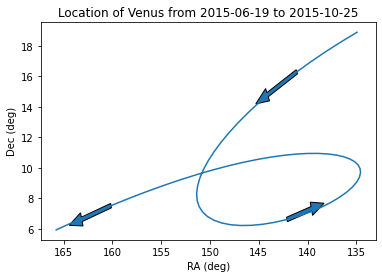

In [5]:
times = np.arange(57192,57322,2) #This is just arbitrary MJDs I've chosen, sampled at 2 day intervals.
ts = Time(times,format='mjd',scale='utc') #Convering the MJDs to a Time format which Astropy can read.
loc = EarthLocation.of_site('greenwich') #Our observations have to be taken somwhere, let's use Greenwich for ease of use.
with solar_system_ephemeris.set('builtin'):
    venus = get_body('venus', ts, loc) # Get the location of venus
plt.plot(venus.ra,venus.dec,'-') #Plotting the RA and Dec of venus
plt.arrow(venus.ra.value[4],venus.dec.value[4],3,-1.5,width=0.3)
plt.arrow(venus.ra.value[29],venus.dec.value[29],-2.5,0.7,width=0.3)
plt.arrow(venus.ra.value[-4],venus.dec.value[-4],3,-0.9,width=0.3)
plt.title(f"Location of Venus from {ts[0].isot[:10]} to {ts[-1].isot[:10]}")
plt.ylabel("Dec (deg)")
plt.xlabel("RA (deg)")
plt.gca().invert_xaxis() #RA normally increases from right to left - we'll explain why this is later on
plt.show()

Hipparchus proposed a slight augmentation to Plato's model to explain the retrograde motion of these planets. This model involed a system of circles. For any given planet, it rotated on an **epicycle** which in turn rotated on a larger **deferent** as below. This still didn't agree with the motion of the planets adequately, which led Ptolemy to augment the model by offsetting the Earth from the centre of the deferent and adding an **equant**. The planet still orbits the deferent centre, but it's assumed that $\frac{d\theta}{dt}$ is constant, which allows for a circular orbit to give the same observed effects as a body which is following an elliptical orbit. While still not perfect at predicting the motions of the planets, it could easily be adapted to new observations by adding in new circles.

![Hipparchus Model](Images/Figure_2.png)

<div class="alert alert-block alert-danger">
These models were incredibly precise at predicting the positions of stars, the requirement to constantly add new circles to explain the complex motion of the planets suggested that something was wrong with them.
</div>

## Heliocentrism

It took until the 15th century to move away from this geocentric view of the solar system, when Nicolaus Copernicus proposed a heliocentric model of the planets. One immedate consequence of this was that the maximum angular distance of both Venus (47 degrees) and Mercury (28 degrees) meant that they had to lie within Earth's orbit, and that Mercury had to lie closest to the Sun.

![Copernicus Model](Images/Figure_3.png)

The Copernican model of the Solar system could easily account for the retrograde motion of the planets, which was a major failing of any geocentric models. An example of how the sudden reversals in a planets direction of motion across the night sky is shown in the below Figure. The numbers indicate different observing times, starting from 1 and ending at 6. Between observation 3 and 4, Mars undergoes a "reversal" in the night sky.

![Retrograde motion explained](Images/Figure_4.png)

Heliocentrism also allows us to calculate the **true** (sidereal) orbital periods of the planets. Consider a planet which is further from Earth than the Sun. The time between successive conjunctions (the planet being 180 degrees away from the sun in the sky) is S, the synodic period. The sidereal period of the planet, P, can then be calculated using

$$
    \frac{1}{S} = \frac{1}{P_\oplus}-\frac{1}{P}
$$

where $P_\oplus$ is the Earth's synodic period of 365.256308 days. Once P has been determined, Kepler's laws can then be used the separation between the Sun and the planet. While excellent elegant in explaining the motion of the planets, the heliocentric model was as accurate as the geocentric model when it came to predicting the positions of bodies in the night sky - mainly because Copernicus still required  that planets orbit in perfect circles. Epicycles were introduced into the Copernican model in order to have the predicted observations match positions.

It wasn't until Kepler derived his laws and incorporated eccentricties into the orbits of planets that the accuraacy of positions increased by several orders of magnitudes, helping solidify the heliocentric model as the correct model.